Importing important libraries!!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing files
from google.colab import files

# uploading file
uploaded_file=files.upload()
file_name=list(uploaded_file.keys())[0]
df=pd.read_csv(file_name)
print(df.head())
print(df.tail())
print(df.sample())




Saving Skyserver_SQL2_27_2018 6_51_39 PM.csv.zip to Skyserver_SQL2_27_2018 6_51_39 PM.csv.zip
          objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598370  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  7

In [ ]:
df=pd.read_csv(file_name)
#summary of the data
print(df.info)
print(df.describe())

<bound method DataFrame.info of              objid          ra        dec         u         g         r  \
0     1.237650e+18  183.531326   0.089693  19.47406  17.04240  15.94699   
1     1.237650e+18  183.598370   0.135285  18.66280  17.21449  16.67637   
2     1.237650e+18  183.680207   0.126185  19.38298  18.19169  17.47428   
3     1.237650e+18  183.870529   0.049911  17.76536  16.60272  16.16116   
4     1.237650e+18  183.883288   0.102557  17.55025  16.26342  16.43869   
...            ...         ...        ...       ...       ...       ...   
9995  1.237650e+18  131.316413  51.539547  18.81777  17.47053  16.91508   
9996  1.237650e+18  131.306083  51.671341  18.27255  17.43849  17.07692   
9997  1.237650e+18  131.552562  51.666986  18.75818  17.77784  17.51872   
9998  1.237650e+18  131.477151  51.753068  18.88287  17.91068  17.53152   
9999  1.237650e+18  131.665012  51.805307  19.27586  17.37829  16.30542   

             i         z   run  rerun  camcol  field     specobjid 

In [ ]:
#counting number of missing values in each column
print(df.isnull().sum())
#analysing datatypes per column
print(df.dtypes)
#check for duplicate rows
print(df.duplicated().sum())

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64
objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class         object
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object
0


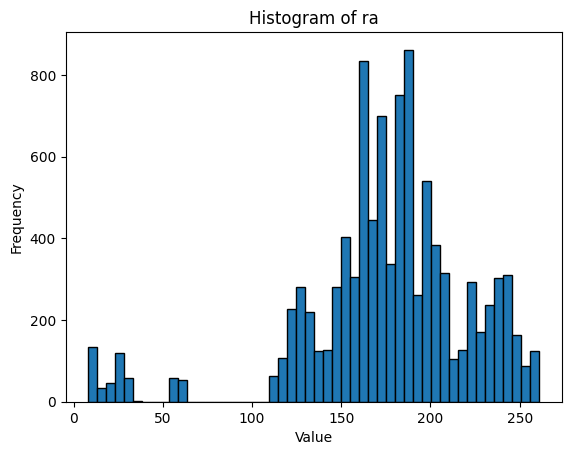

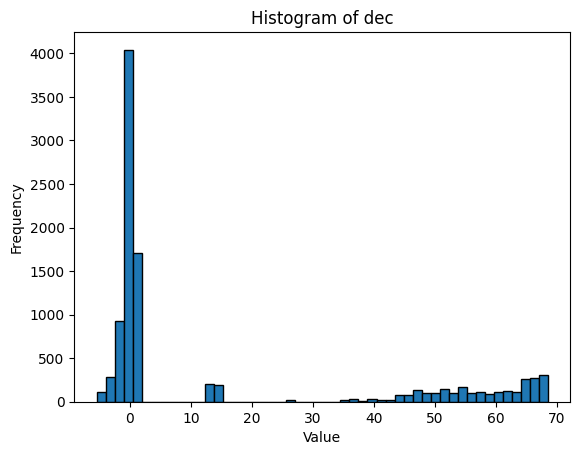

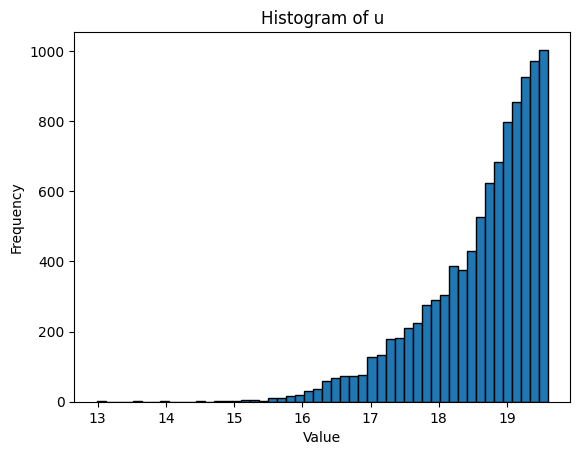

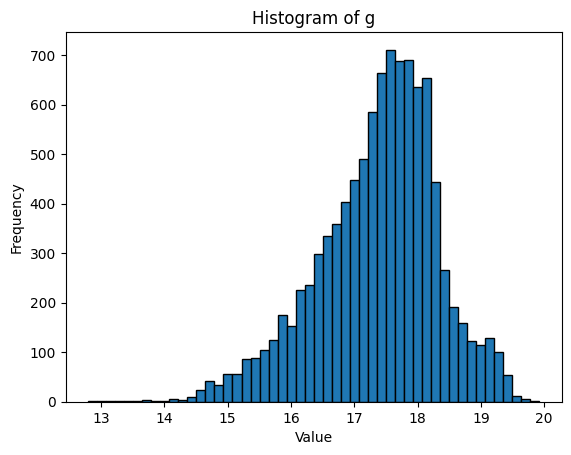

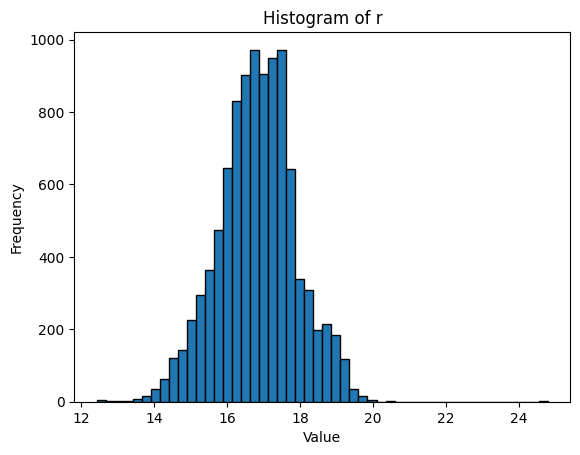

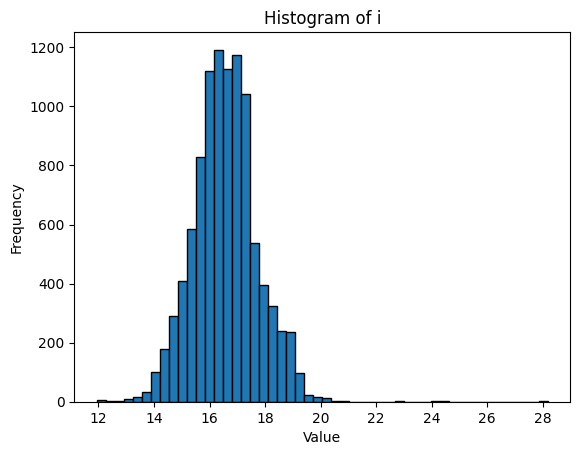

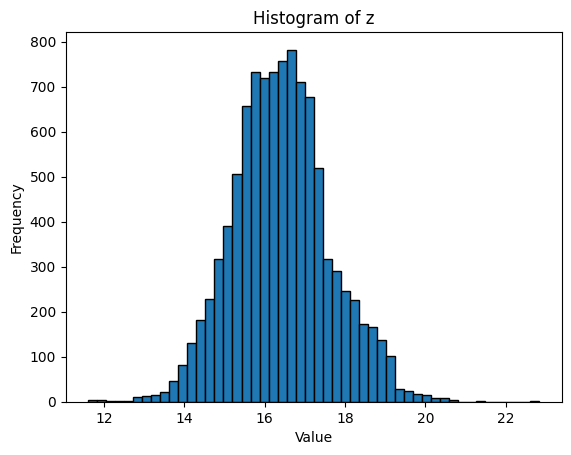

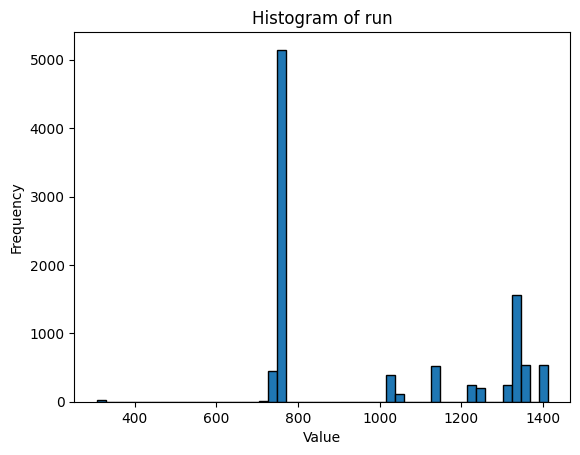

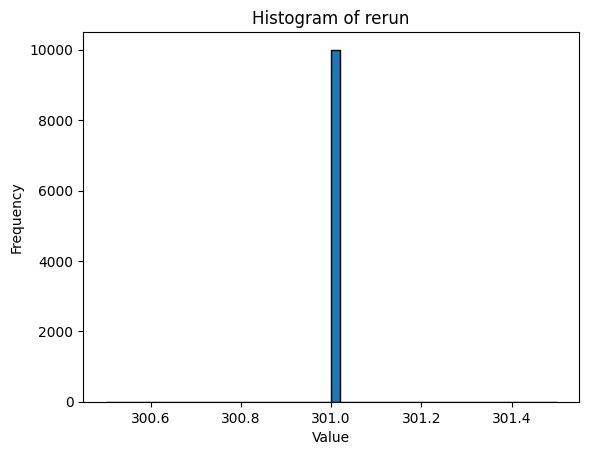

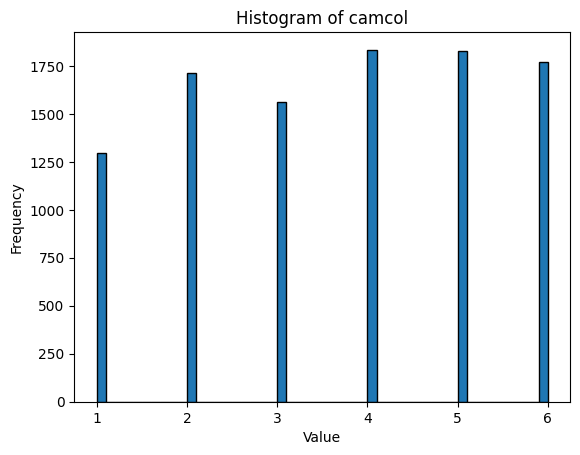

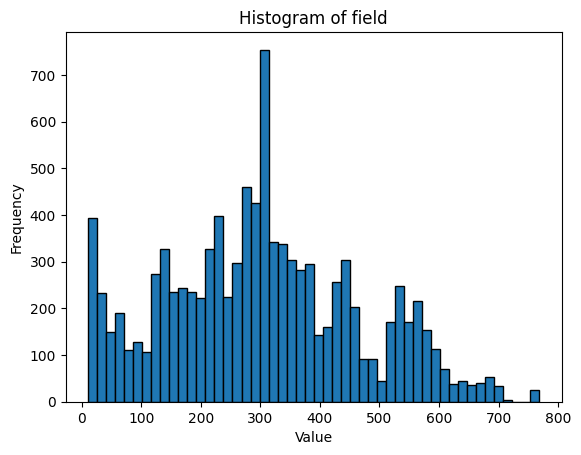

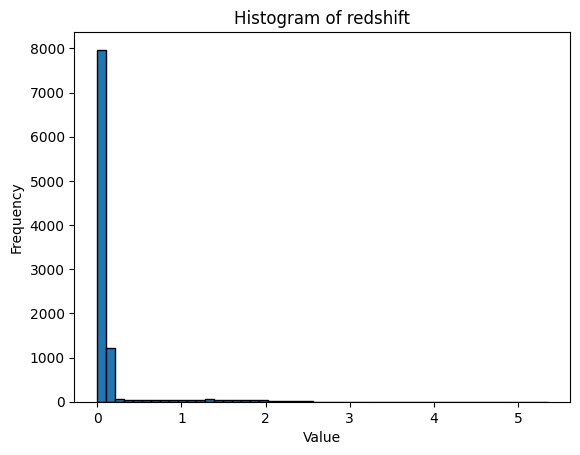

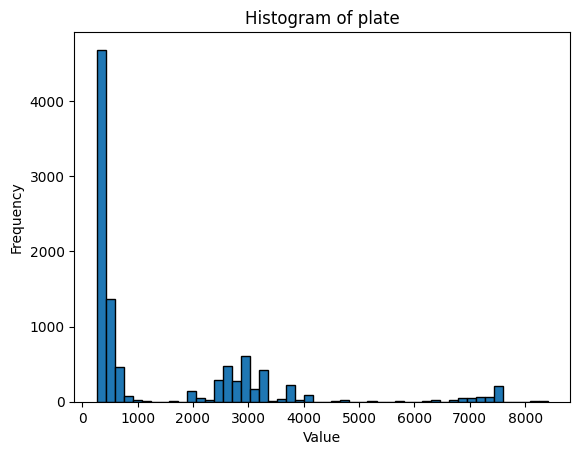

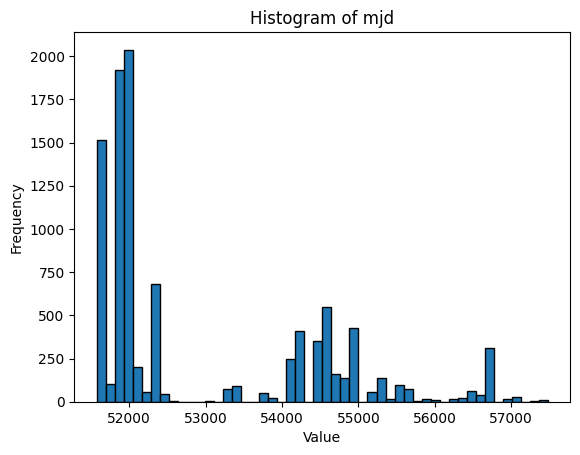

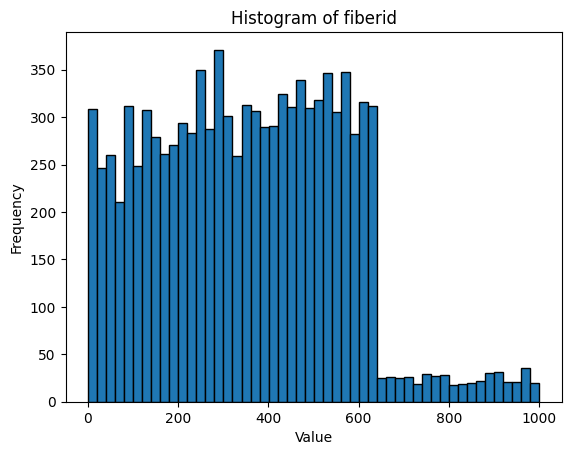

In [ ]:
#analyzing the distribution of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if df[col].max() < 1e10 and df[col].min() > -1e10:  # adjust the threshold as needed
        plt.hist(df[col], bins=50, edgecolor='black')
        plt.title(f"Histogram of {col}")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()

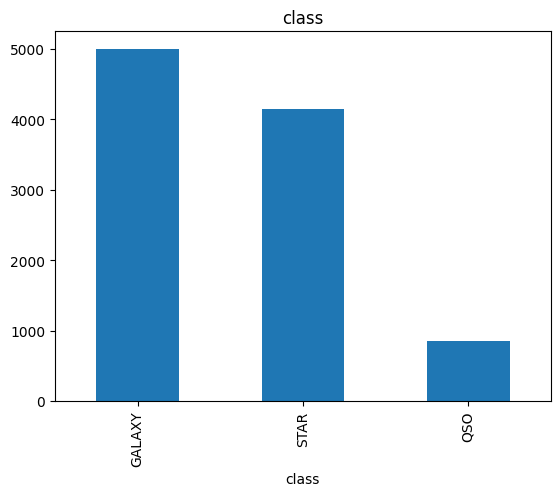

In [ ]:
#Analyze the distribution of categorical features
categorical_cols=df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  df[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.show()

In [ ]:
#Feature engineering
# combining r,i,z (these are the diferent wavelengths of light captured from the celestial object) since they are highly corelated ,nerly 1.
df['riz_avg']=(df['r']+df['i']+df['z'])/3
print(df['riz_avg'])

0       15.558573
1       16.519030
2       17.120950
3       16.015957
4       16.535623
          ...    
9995    16.701277
9996    16.830833
9997    17.457407
9998    17.344747
9999    15.882260
Name: riz_avg, Length: 10000, dtype: float64


In [ ]:
#Feature selection
#we have dropped r,i,z,specobjid,objid,rerun
#object ids are unique so they are not useful in model training , and rerun was completely non corelated with any other numerical feature
data=df.drop(['i','r','z','objid','rerun','specobjid'],axis=1)
print(data.head())

           ra       dec         u         g  run  camcol  field   class  \
0  183.531326  0.089693  19.47406  17.04240  752       4    267    STAR   
1  183.598370  0.135285  18.66280  17.21449  752       4    267    STAR   
2  183.680207  0.126185  19.38298  18.19169  752       4    268  GALAXY   
3  183.870529  0.049911  17.76536  16.60272  752       4    269    STAR   
4  183.883288  0.102557  17.55025  16.26342  752       4    269    STAR   

   redshift  plate    mjd  fiberid    riz_avg  
0 -0.000009   3306  54922      491  15.558573  
1 -0.000055    323  51615      541  16.519030  
2  0.123111    287  52023      513  17.120950  
3 -0.000111   3306  54922      510  16.015957  
4  0.000590   3306  54922      512  16.535623  


           ra  dec    u    g  run  camcol  field  redshift  plate  mjd  \
ra        1.0  NaN  NaN  NaN  NaN     NaN    NaN       NaN    NaN  NaN   
dec       NaN  1.0  NaN  NaN  NaN     NaN    NaN       NaN    NaN  NaN   
u         NaN  NaN  1.0  NaN  NaN     NaN    NaN       NaN    NaN  NaN   
g         NaN  NaN  NaN  1.0  NaN     NaN    NaN       NaN    NaN  NaN   
run       NaN  NaN  NaN  NaN  1.0     NaN    NaN       NaN    NaN  NaN   
camcol    NaN  NaN  NaN  NaN  NaN     1.0    NaN       NaN    NaN  NaN   
field     NaN  NaN  NaN  NaN  NaN     NaN    1.0       NaN    NaN  NaN   
redshift  NaN  NaN  NaN  NaN  NaN     NaN    NaN       1.0    NaN  NaN   
plate     NaN  NaN  NaN  NaN  NaN     NaN    NaN       NaN    1.0  NaN   
mjd       NaN  NaN  NaN  NaN  NaN     NaN    NaN       NaN    NaN  1.0   
fiberid   NaN  NaN  NaN  NaN  NaN     NaN    NaN       NaN    NaN  NaN   
riz_avg   NaN  NaN  NaN  NaN  NaN     NaN    NaN       NaN    NaN  NaN   

          fiberid  riz_avg  
ra      

<function matplotlib.pyplot.show(close=None, block=None)>

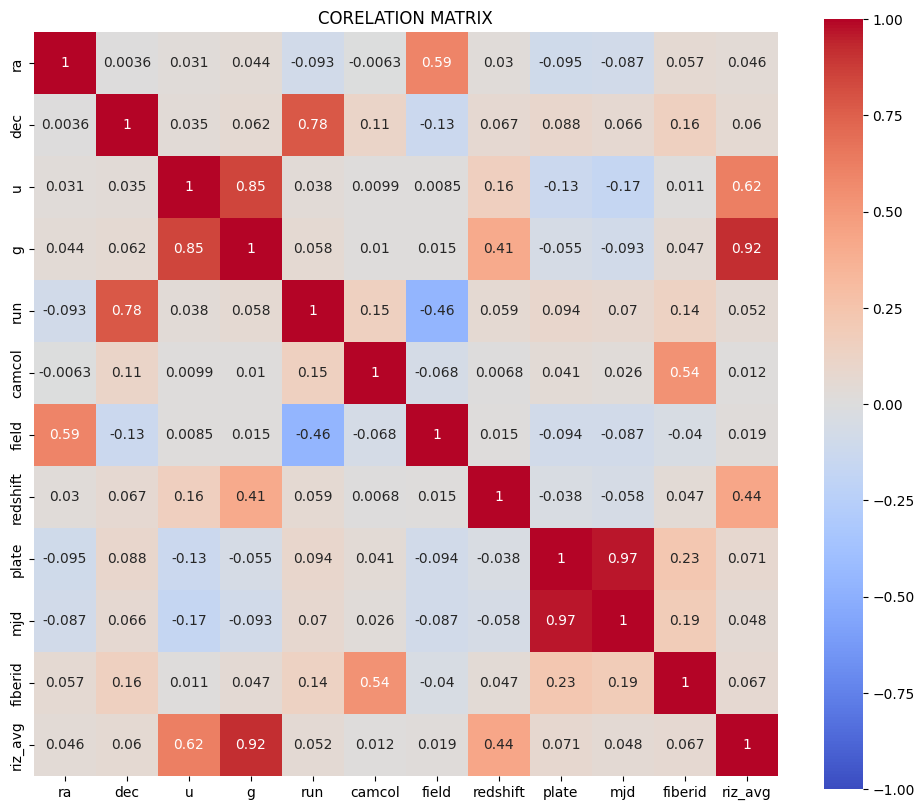

In [ ]:
#Exploring co-relations between numerical features
'''here we are using heatmap to visualize the corelation between numerical features'''
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
cor_matrix=data[numerical_cols].corr()
plt.figure(figsize=(12,10))
#mask=np.triu(np.ones_like(cor_matrix,dtype=bool))
sns.heatmap(cor_matrix,annot=True,cmap='coolwarm',square=True,vmin=-1,vmax=1)
plt.title('CORELATION MATRIX')
high_corelations=cor_matrix[cor_matrix>=0.98]
print(high_corelations)
plt.show


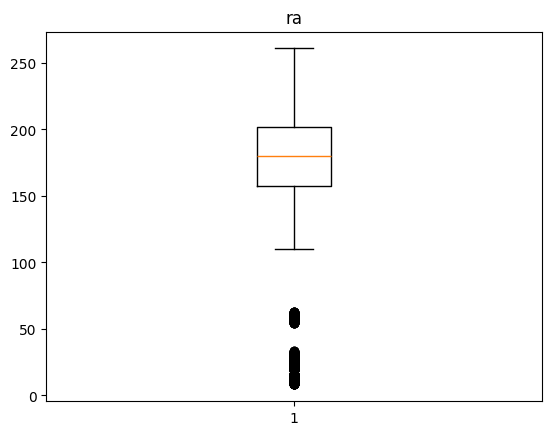

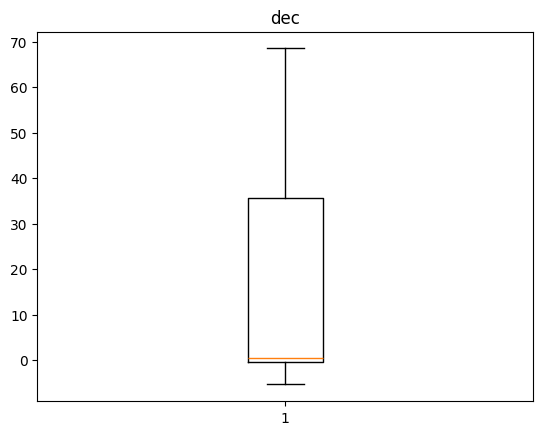

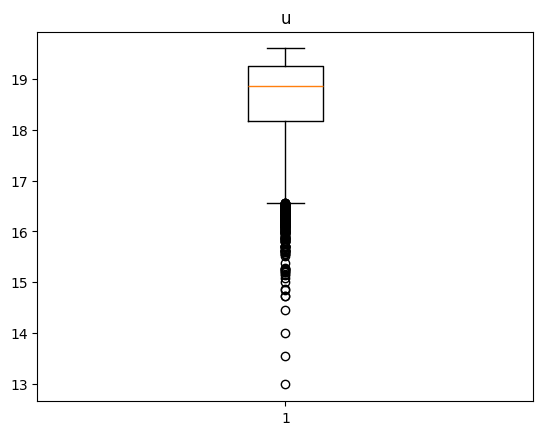

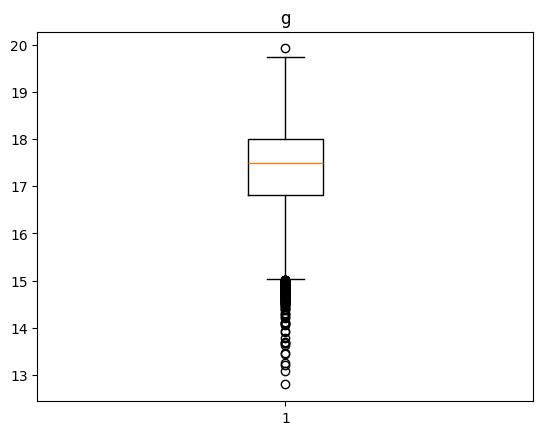

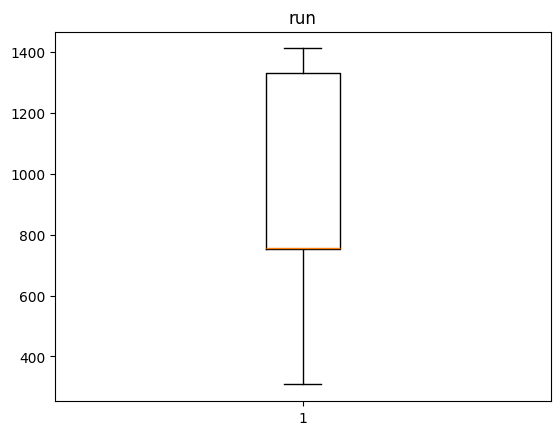

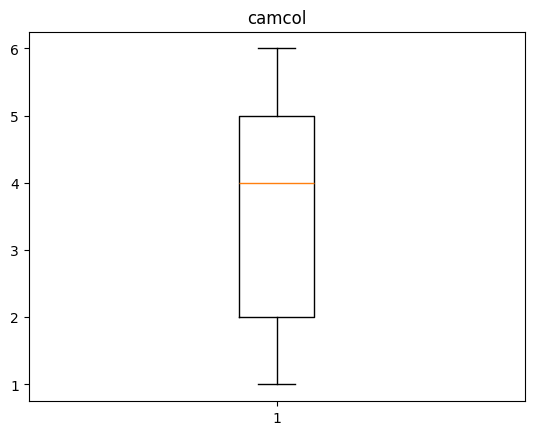

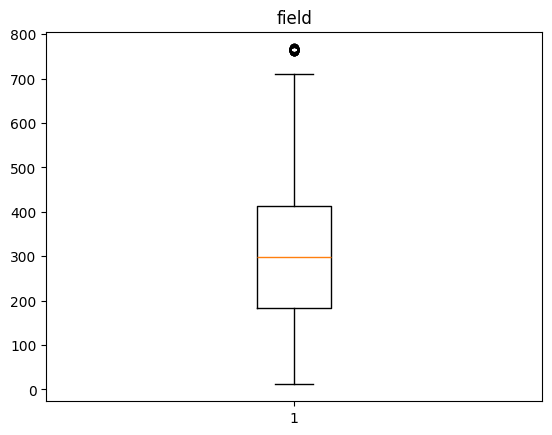

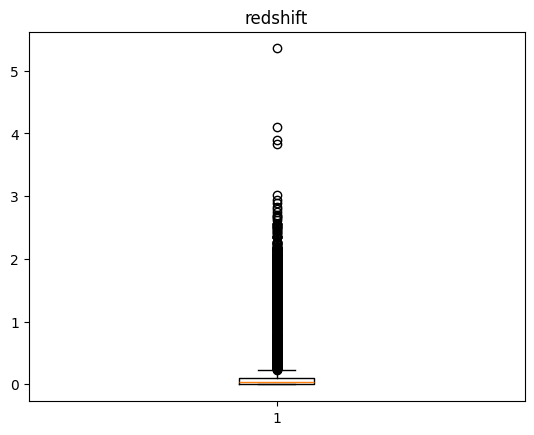

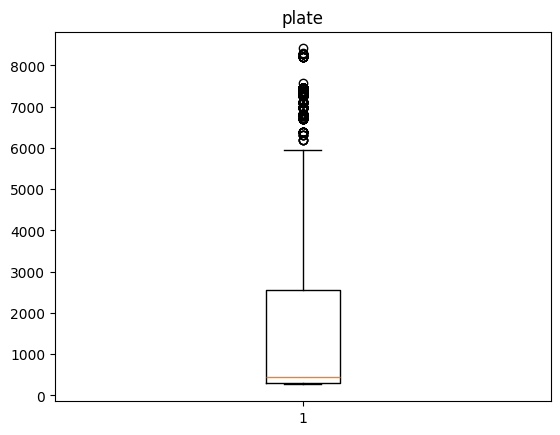

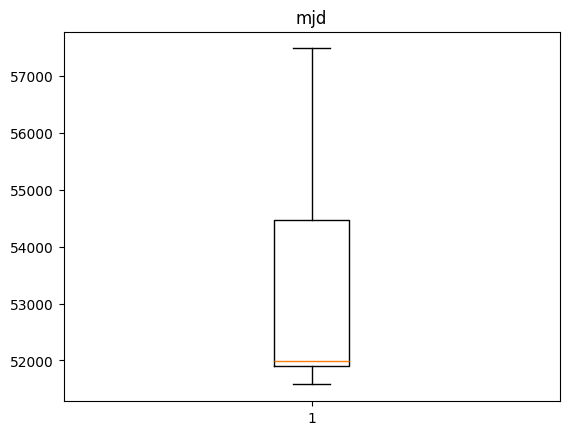

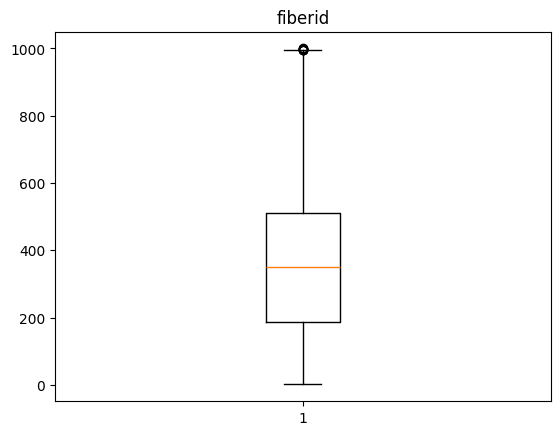

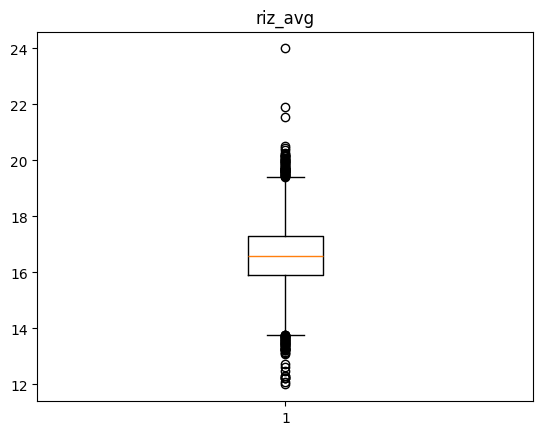

In [ ]:
#Analyzing outliners using boxplot!!
for col in numerical_cols:
  plt.boxplot(data[col])
  plt.title(col)
  plt.show()

In [ ]:
#Seperatin the input and target variales
from sklearn.model_selection  import train_test_split
X=data.drop('class',axis=1)#dropping the depemndent variable
y=data['class']#Storing the target variable
#Split the data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
#create pipelines
svm_pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('svm',SVC())
])
rf_pipeline=Pipeline([
    ('scaler',StandardScaler()),
    ('rf',RandomForestClassifier())
])
#Hyperparameters
svm_params={
    'svm__C':[0.1,1,10],
    'svm__kernel':['rbf','linear'],
    'svm__gamma':[0.1,1,10]
}
rf_params={
    'rf__n_estimators':[100,200,300],
    'rf__max_depth':[None,5,10],
}

In [23]:
from sklearn.model_selection import GridSearchCV
# Stratified K-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search for SVM
svm_grid_search = GridSearchCV(
    svm_pipeline,
    svm_params,
    cv=cv,
    scoring='f1_weighted'
)
svm_grid_search.fit(X_train, y_train)

# Grid Search for Random Forest
rf_grid_search = GridSearchCV(
    rf_pipeline,
    rf_params,
    cv=cv,
    scoring='f1_weighted'
)
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': [None, 5, 10],
                         'rf__n_estimators': [100, 200, 300]},
             scoring='f1_weighted')

In [24]:
# Predictions
svm_best = svm_grid_search.best_estimator_
rf_best = rf_grid_search.best_estimator_

svm_pred = svm_best.predict(X_test)
rf_pred = rf_best.predict(X_test)

# Classification Reports
print("SVM Classification Report:")
svm_report = classification_report(y_test, svm_pred, output_dict=True)
print(classification_report(y_test, svm_pred))

print("\nRandom Forest Classification Report:")
rf_report = classification_report(y_test, rf_pred, output_dict=True)
print(classification_report(y_test, rf_pred))

# Results Table
results = pd.DataFrame({
    'Model': ['SVM', 'Random Forest'],
    'Precision': [
        svm_report['weighted avg']['precision'],
        rf_report['weighted avg']['precision']
    ],
    'Recall': [
        svm_report['weighted avg']['recall'],
        rf_report['weighted avg']['recall']
    ],
    'F1-Score': [
        svm_report['weighted avg']['f1-score'],
        rf_report['weighted avg']['f1-score']
    ],
    'Accuracy': [
        accuracy_score(y_test, svm_pred),
        accuracy_score(y_test, rf_pred)
    ]
})

print("\nResults Table:")
print(results)

# Best Model Hyperparameters
print("\nBest SVM Hyperparameters:")
print(svm_grid_search.best_params_)

print("\nBest Random Forest Hyperparameters:")
print(rf_grid_search.best_params_)

SVM Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1000
         QSO       1.00      0.96      0.98       170
        STAR       0.99      1.00      0.99       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.99      2000
weighted avg       0.99      0.99      0.99      2000


Random Forest Classification Report:
              precision    recall  f1-score   support

      GALAXY       0.99      0.99      0.99      1000
         QSO       0.98      0.94      0.96       170
        STAR       0.99      1.00      1.00       830

    accuracy                           0.99      2000
   macro avg       0.99      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000


Results Table:
           Model  Precision  Recall  F1-Score  Accuracy
0            SVM   0.991067   0.991  0.990981     0.991
1  Random Forest   0.990961   0.991  0.990940